In [1]:
!pip install xarray
!pip install WordCloud
!pip install texthero
!pip install gensim.sklearn_api

ERROR: Could not find a version that satisfies the requirement gensim.sklearn_api (from versions: none)
ERROR: No matching distribution found for gensim.sklearn_api


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import re
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import numpy as np 
import matplotlib
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import spacy
from string import punctuation
from nltk.corpus import wordnet
import numpy as np


stemmer = PorterStemmer()
sp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91707\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91707\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91707\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91707\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91707\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Cleaning

In [4]:
df = pd.read_csv('D:/car_price/omdena/victims_stories_from_fb_groups.csv')
df.head()

,created_at,post_id,post_url,post_text,author_id,author_username
0,2021-06-07 04:27:28,1944713005695266,https://m.facebook.com/groups/104190026414249/...,But on a positive note thank you all for your ...,1.000030e+14,Rita Allen
1,2021-06-07 04:24:38,1944711902362043,https://m.facebook.com/groups/104190026414249/...,So I made an acquaintance and I had a really g...,1.000030e+14,Rita Allen
2,2021-06-06 08:41:10,1944115989088301,https://m.facebook.com/groups/104190026414249/...,I called 911 for my domestic violence paramedi...,1.000663e+14,Melissa Barr-Ellifritt
3,2021-06-05 17:04:15,1943613362471897,https://m.facebook.com/groups/104190026414249/...,Prayers needed got to take my girl crew to get...,1.000030e+14,Rita Allen
4,2021-06-05 11:44:56,1943450062488227,https://m.facebook.com/groups/104190026414249/...,QUESTION....\n\nWhat could I've done so wrong ...,1.000030e+14,Rita Allen


In [5]:
df.isnull().sum()

created_at          0
post_id             0
post_url            0
post_text          12
author_id          23
author_username     0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

created_at         0
post_id            0
post_url           0
post_text          0
author_id          0
author_username    0
dtype: int64

In [7]:
import re 

def removeEmojis(tweets):

  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
  
  removed_emo = [emoji_pattern.sub(r'', tweet) for tweet in tweets]
  return removed_emo

def clean_text(tweets):

  # removing duplicated tweets
  #print('Total number of posts: ', len(tweets))
  #filtered_tweets = list(set(tweets))
  #print('Total number of posts after removing duplicates: ', len(filtered_tweets))

  filtered_tweets = tweets

  # removing emojis
  removed_emo = removeEmojis(filtered_tweets)

  # tweet lowering, removing links, websites, numbers, mathematical operators, brackets, usernames, retweets
  clean_tweets = []
  for tweet in removed_emo:
    tweet = tweet.lower()
    tweet = re.sub(
                r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''',
                ' ', tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = tweet.replace('rt ','')
    tweet = re.sub('\s+', ' ', tweet)
    tweet = re.sub('\d+', ' ', tweet)
    tweet = re.sub('#[^\s]+','',tweet)
    
    clean_tweets.append(tweet)

  return ''.join(clean_tweets)




In [8]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english', ignore_stopwords=True)
tokenizer = RegexpTokenizer('\s+', gaps = True)
lemmatizer = WordNetLemmatizer()
def norm_text(string):
    '''
    This function is for text:
      1. tokenization
      2. lemmatization
      3. stemming
    '''
    tokenized_text = tokenizer.tokenize(string.lower())
    lemmatized = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words]
    stemmed = ' '.join([stemmer.stem(word) for word in lemmatized])

    return stemmed

In [9]:
df['cleaned'] = [clean_text(text) for text in df['post_text']]
df['stemmed'] = [norm_text(text) for text in df['post_text']]


In [10]:
df.head()

,created_at,post_id,post_url,post_text,author_id,author_username,cleaned,stemmed
0,2021-06-07 04:27:28,1944713005695266,https://m.facebook.com/groups/104190026414249/...,But on a positive note thank you all for your ...,1.000030e+14,Rita Allen,but on a positive note thank you all for your ...,posit note thank prayer daughter lab result av...
1,2021-06-07 04:24:38,1944711902362043,https://m.facebook.com/groups/104190026414249/...,So I made an acquaintance and I had a really g...,1.000030e+14,Rita Allen,so i made an acquaintance and i had a really g...,made acquaint realli good day yesterday today ...
2,2021-06-06 08:41:10,1944115989088301,https://m.facebook.com/groups/104190026414249/...,I called 911 for my domestic violence paramedi...,1.000663e+14,Melissa Barr-Ellifritt,i called for my domestic violence paramedi...,call 911 domest violenc paramed show took hosp...
3,2021-06-05 17:04:15,1943613362471897,https://m.facebook.com/groups/104190026414249/...,Prayers needed got to take my girl crew to get...,1.000030e+14,Rita Allen,prayers needed got to take my girl crew to get...,prayer need got take girl crew get major blood...
4,2021-06-05 11:44:56,1943450062488227,https://m.facebook.com/groups/104190026414249/...,QUESTION....\n\nWhat could I've done so wrong ...,1.000030e+14,Rita Allen,question.... what could i've done so wrong in...,question.... could i'v done wrong life constan...


In [11]:
#Sentiment analysis


In [12]:

df['text_blob'] = [TextBlob(text) for text in df['cleaned']]
df['text_analysis'] = [t.sentiment.polarity for t in df['text_blob']]


In [13]:
pos = [t.sentiment.polarity > 0 for t in df['text_blob']]
neg = [t.sentiment.polarity < 0 for t in df['text_blob']]
neu = [t.sentiment.polarity == 0 for t in df['text_blob']]
print('Positive df: ', pos.count(True))
print('Negative df: ', neg.count(True))
print('Neutral df: ', neu.count(True))

Positive df:  149
Negative df:  118
Neutral df:  42


In [14]:

positive_df = df.loc[df['text_analysis'] > 0]
neutral_df = df.loc[df['text_analysis'] == 0]
negative_df = df.loc[df['text_analysis'] < 0]

In [15]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:

def word_cloud(tweets):
    
    # Add stopwords
    stopwords = set(sorted(np.unique(list(STOPWORDS) + stop_words)))
    

    wordcloud = WordCloud(
        background_color = 'black',
        width = 1000,
        height = 500,
        stopwords = stopwords).generate(str(tweets.stemmed.values))
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.rcParams['figure.figsize'] = [25, 25]

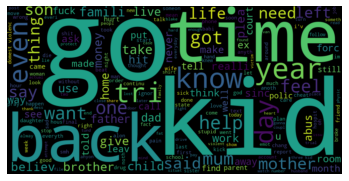

In [17]:
word_cloud(negative_df)

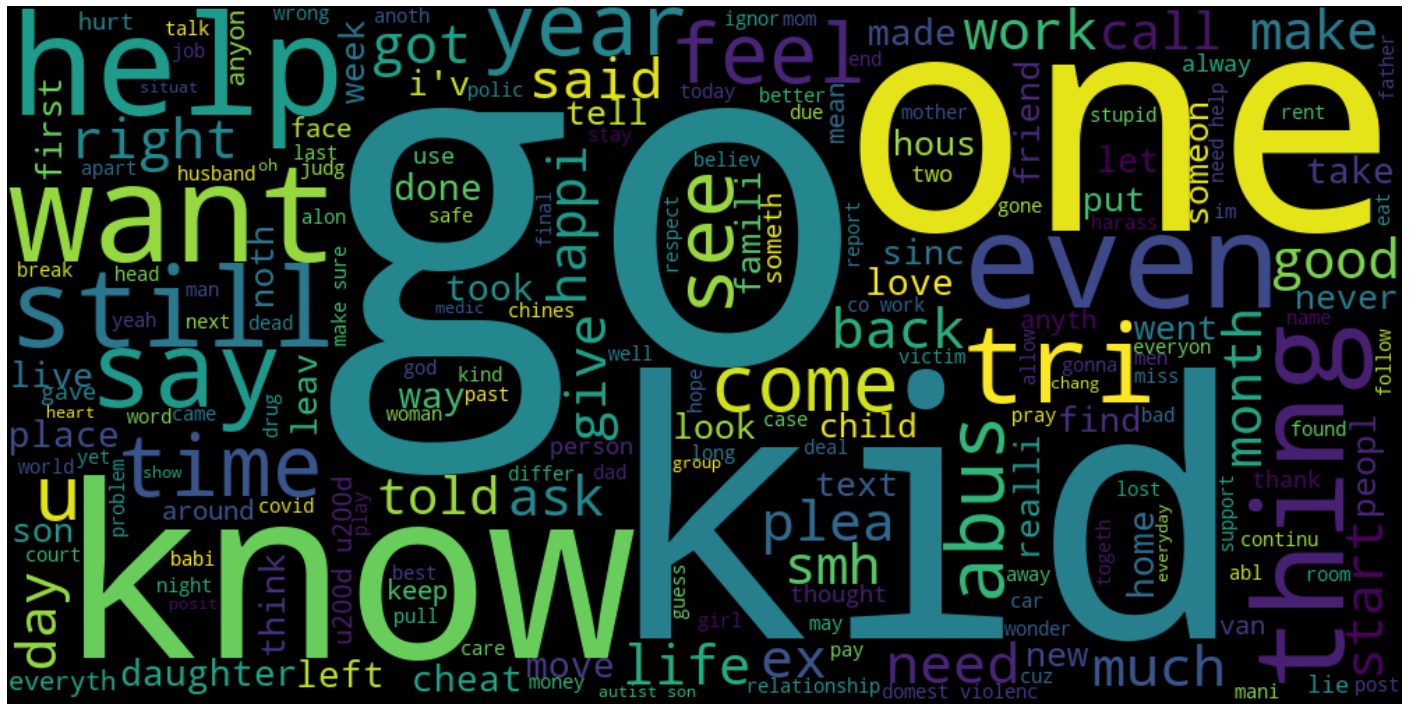

In [18]:
word_cloud(positive_df)

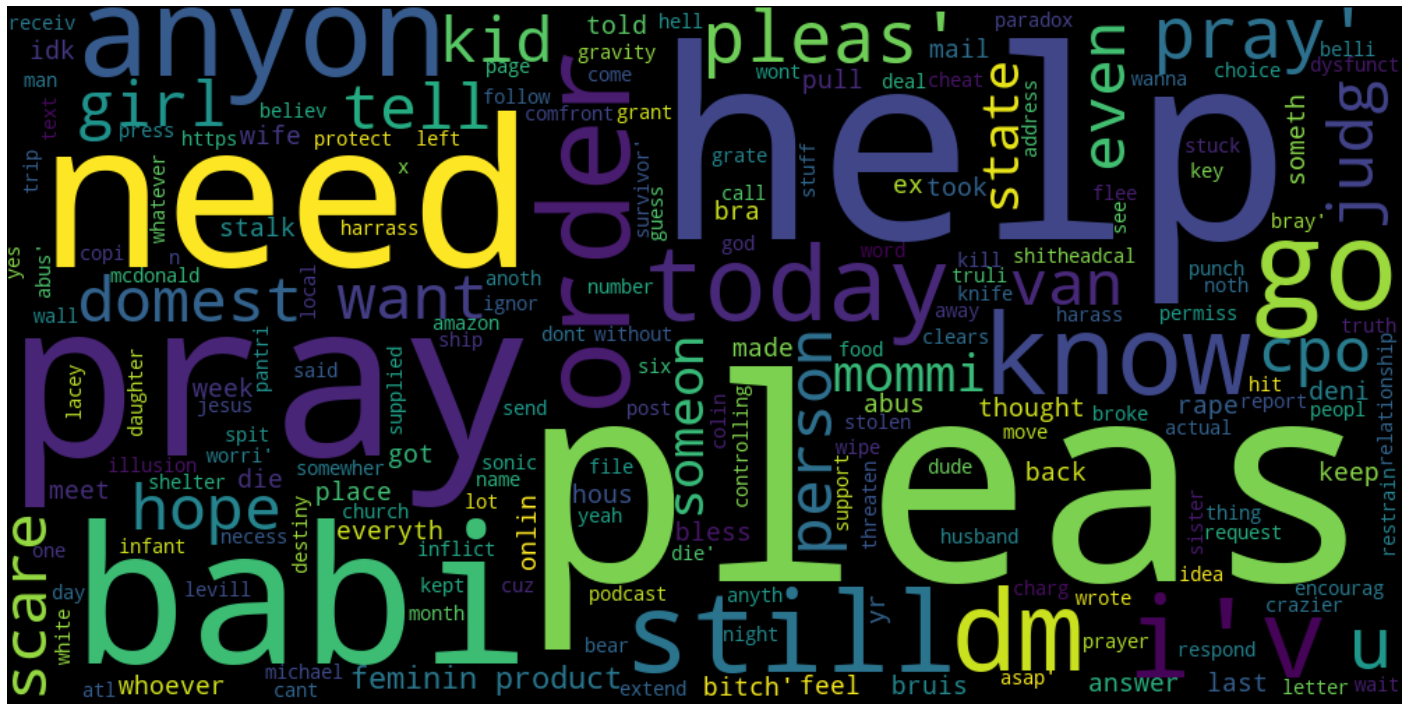

In [19]:
word_cloud(neutral_df)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

def get_top_n_words(x,n,n_g=3):
    vec = CountVectorizer(ngram_range=(n_g,n_g),stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0) 
    words_freq=[(word, sum_words[0,idx]) for word ,idx in vec.vocabulary_.items()]
    words_freq.sort(key = lambda x:x[1],reverse = True)
    return words_freq[:n]

In [21]:
words = get_top_n_words(list(df['stemmed']),20,1)
df1 = pd.DataFrame(words,columns=['trigram','frequency'])
df1= df1.set_index('trigram')
df1.iplot(kind='bar',xTitle='unigram',yTitle='count', title='top 20 unigram')

In [22]:
words = get_top_n_words(list(df['stemmed']),20,2)
df1 = pd.DataFrame(words,columns=['bigram','frequency'])
df1= df1.set_index('bigram')
df1.iplot(kind='bar',xTitle='bigram',yTitle='count', title='top 20 bigram')

In [23]:
words = get_top_n_words(list(df['stemmed']),20,3)
df1 = pd.DataFrame(words,columns=['trigram','frequency'])
df1= df1.set_index('trigram')
df1.iplot(kind='bar',xTitle='unigram',yTitle='count', title='top trigrams unigram')

In [24]:
df.head(2)

,created_at,post_id,post_url,post_text,author_id,author_username,cleaned,stemmed,text_blob,text_analysis
0,2021-06-07 04:27:28,1944713005695266,https://m.facebook.com/groups/104190026414249/...,But on a positive note thank you all for your ...,1.000030e+14,Rita Allen,but on a positive note thank you all for your ...,posit note thank prayer daughter lab result av...,"(b, u, t, , o, n, , a, , p, o, s, i, t, i, ...",0.331818
1,2021-06-07 04:24:38,1944711902362043,https://m.facebook.com/groups/104190026414249/...,So I made an acquaintance and I had a really g...,1.000030e+14,Rita Allen,so i made an acquaintance and i had a really g...,made acquaint realli good day yesterday today ...,"(s, o, , i, , m, a, d, e, , a, n, , a, c, ...",0.052387


In [25]:
#vectorizing and clustering

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import cluster

In [27]:
stemmed = df['stemmed'].tolist()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(stemmed)

model = KMeans(n_clusters=3,init='k-means++',max_iter=100,n_init=1)
model.fit(X)


order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(3):
    print('Cluster:',i)
    for ind in order_centroids[i, :10]:
        print(terms[ind])
    print()

Cluster: 0
get
kid
go
abus
help
need
like
tri
know
he

Cluster: 1
pleas
help
babi
someon
pray
anyon
feminin
scare
bitch
get

Cluster: 2
pray
pleas
today
babi
struggl
lone
hard
someon
sad
day



In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = df['stemmed']
tf_idf_vectorizer =  TfidfVectorizer(stop_words='english',max_features=20000)
tf_idf = tf_idf_vectorizer.fit_transform(data) 
final_df = pd.DataFrame(data = tf_idf.toarray(),columns=tf_idf_vectorizer.get_feature_names())

final_df.T.nlargest(15,0)


,0,1,2,3,4,5,6,7,8,9,...,299,300,301,302,303,304,305,306,307,308
lab,0.364764,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
rang,0.364764,0.000000,0.0,0.398368,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
critic,0.346151,0.000000,0.0,0.378041,0.0,0.0,0.321808,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
avail,0.331714,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.120809,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
result,0.331714,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
note,0.309945,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
posit,0.248841,0.138642,0.0,0.000000,0.0,0.0,0.000000,0.0,0.299127,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
prayer,0.215791,0.000000,0.0,0.235672,0.0,0.0,0.200616,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
today,0.209625,0.116793,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
daughter,0.200498,0.000000,0.0,0.000000,0.0,0.0,0.186398,0.0,0.000000,0.0,...,0.044919,0.000000,0.000000,0.0,0.0,0.206871,0.0,0.0,0.0,0.043052


In [29]:
from sklearn import cluster
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [30]:
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [31]:
k = 4
kmeans_results = run_KMeans(k, final_df)

C:\Users\91707\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\91707\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\91707\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



In [32]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

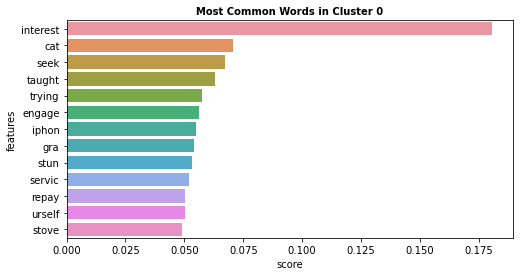

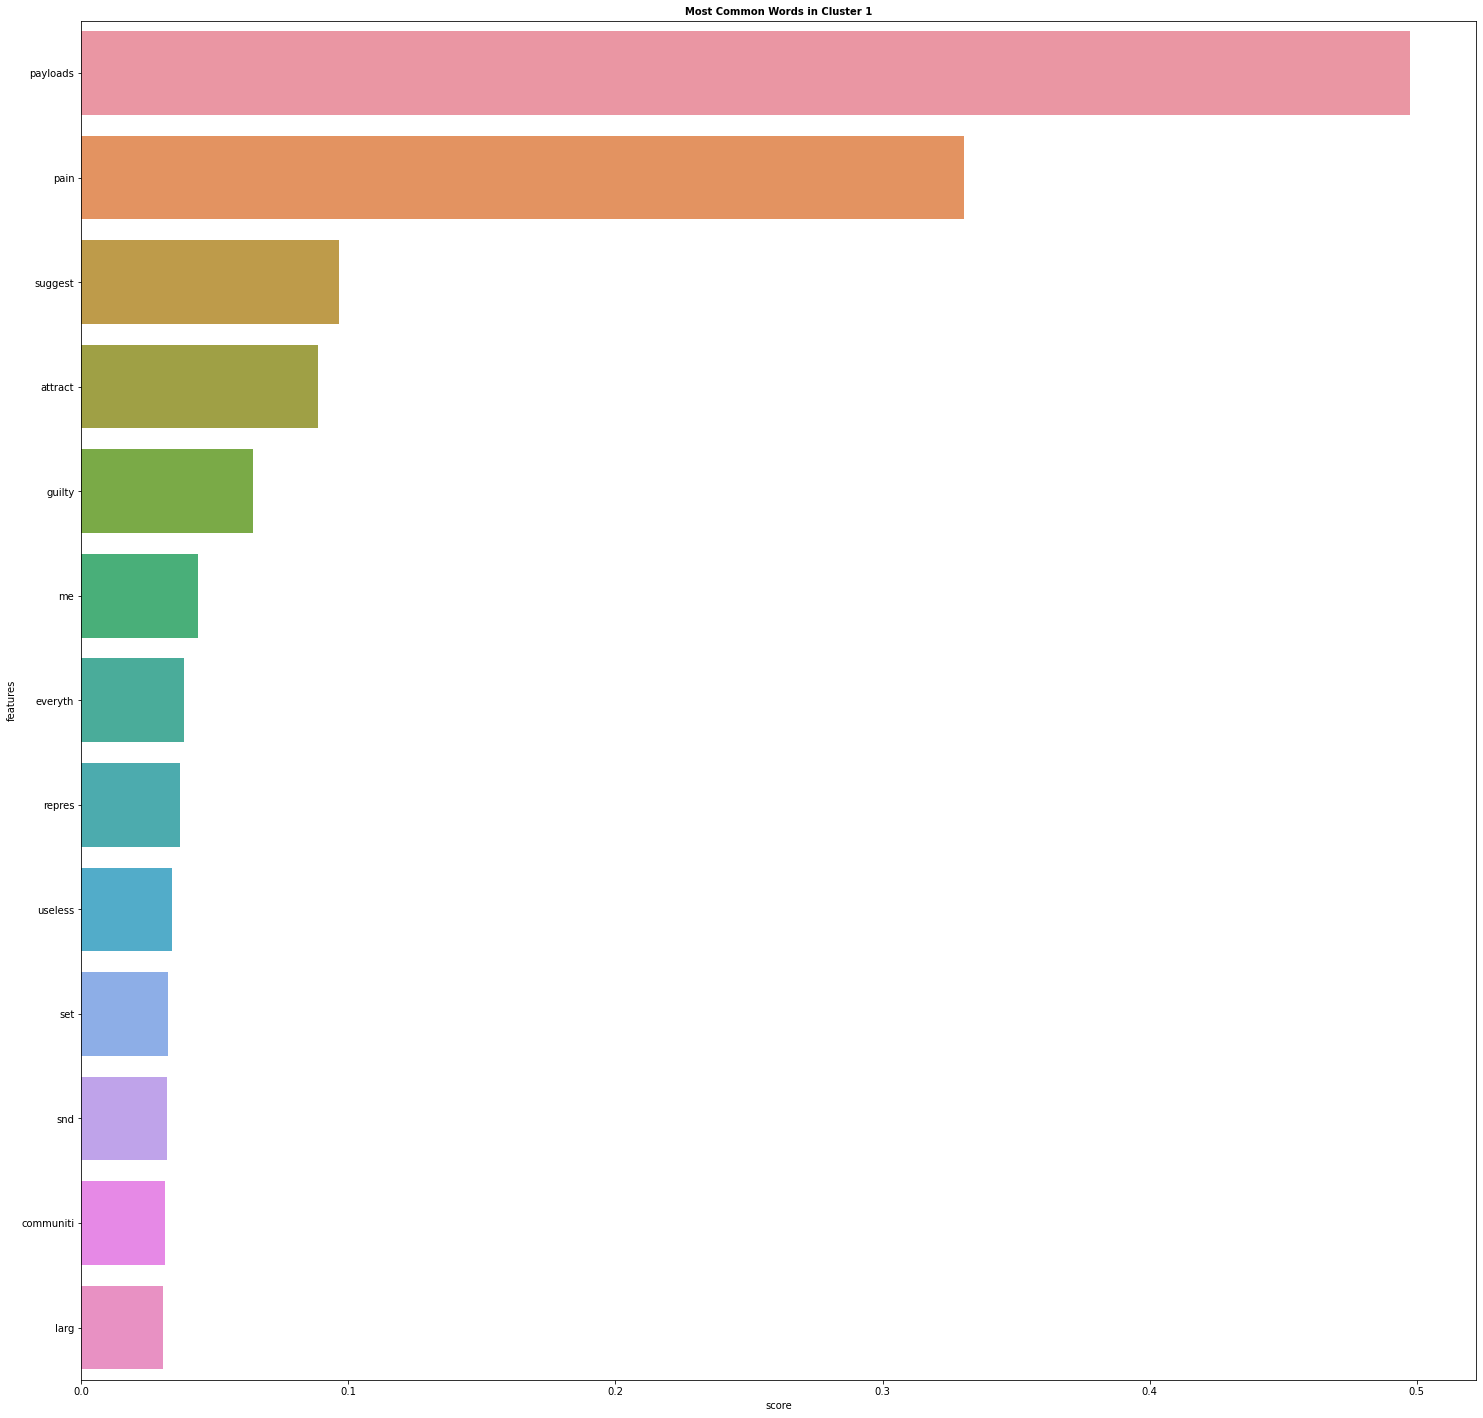

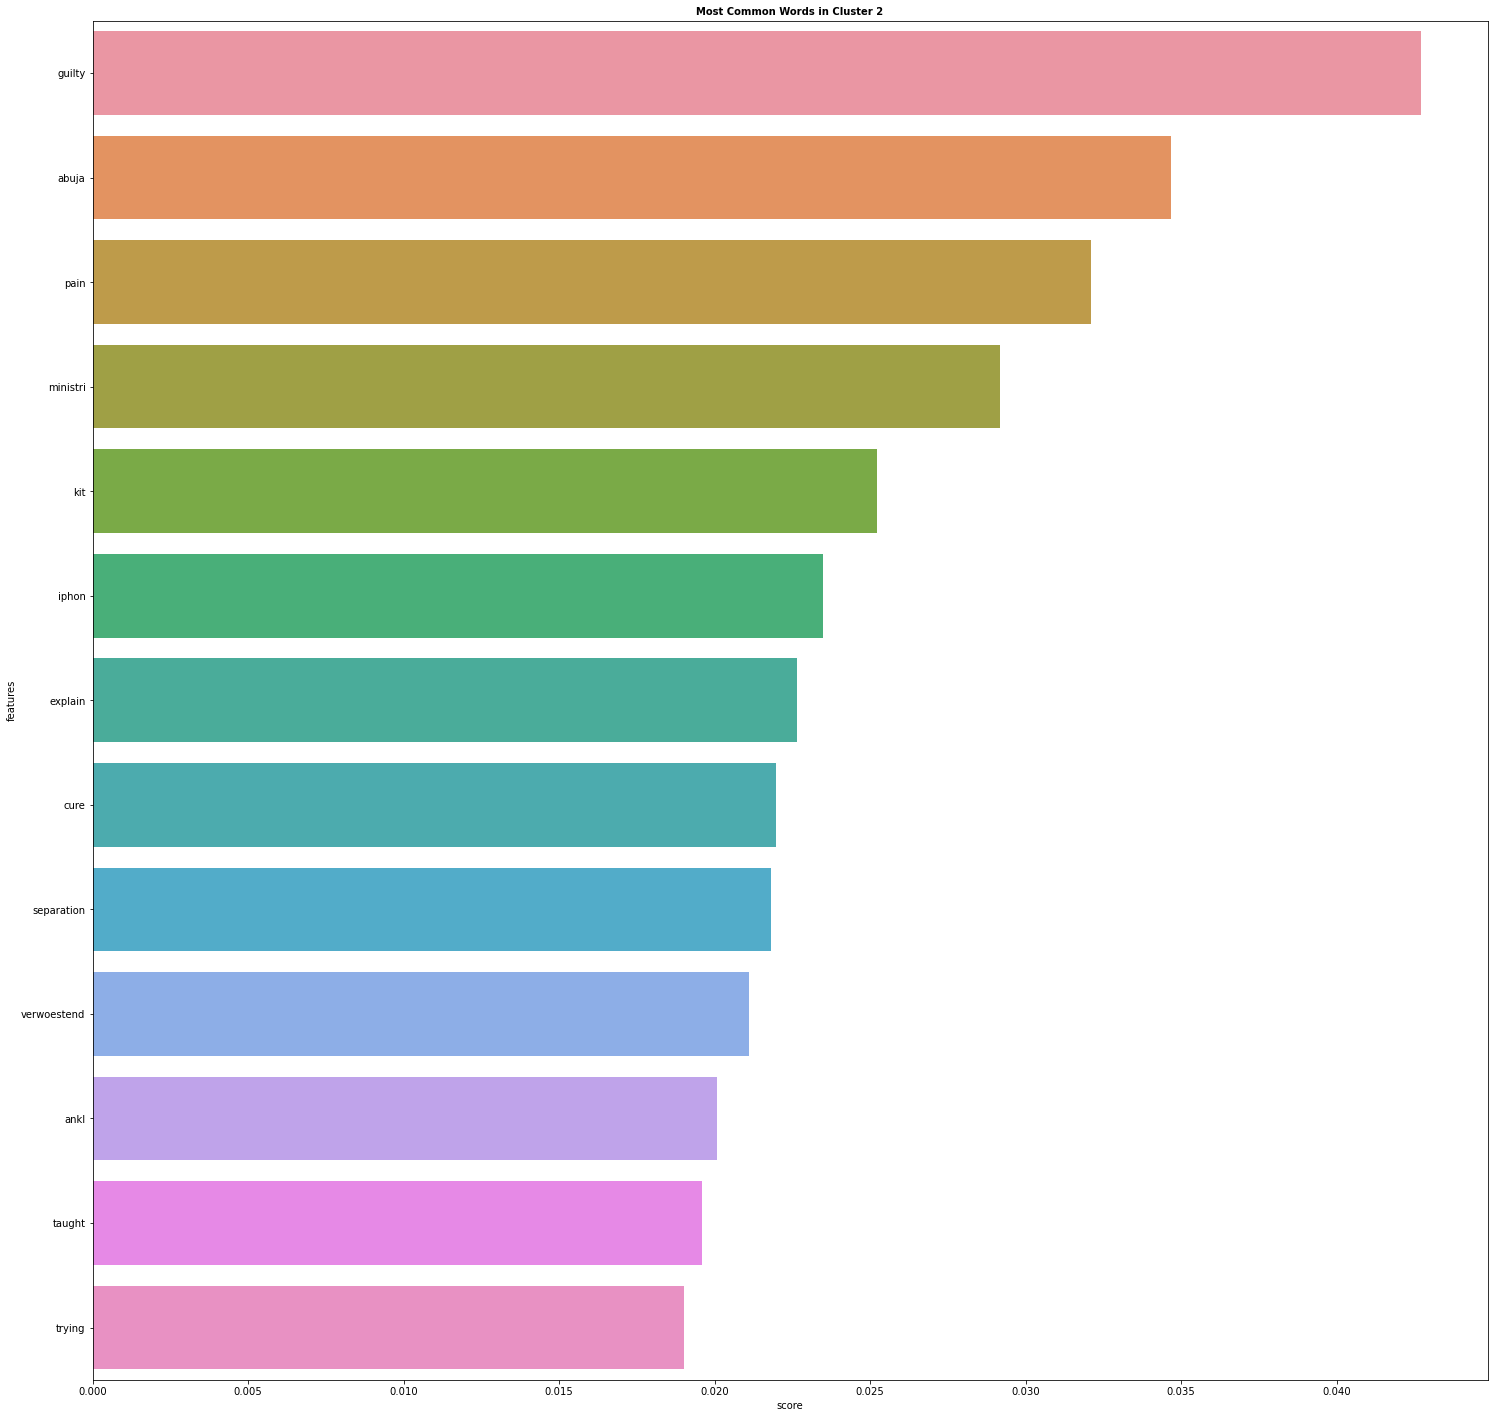

In [33]:
import seaborn as sns
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [35]:
# Assigning the cluster labels
labels = kmeans.labels_ 
df['label'] = labels
df.head()
df.to_csv('labelled_fb_data_using_k_means_3_cluster.csv')